# EECE 550 HW 2 Question 6: Sepic Converter
Shelby Quiring, 10157162, March 15th 2024

In [30]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ctr
import control.matlab as ctrm

In [31]:
# Input Parameters
Vi = 50  # V
Vo = 20  # V
R = 10  # Ohms 

# Calculate duty cycle and control constants
D = Vo / (Vo + Vi)  # 
Io = Vo / R
Ii = Vo/Vi * Io

Vc1 = Vi
Vc2 = Vo
IL1 = Ii
IL2 = -Io


# Component values
L1 = 1e-3
L2 = 2e-3
C1 = 10e-6
C2 = 30e-6

# Define matricies
gamma = np.diag([L1, L2, C1, C2])

alpha = np.array([
    [ 0,       0,     -(1-D),  -(1-D) ],
    [ 0,       0,     -D,       (1-D) ],
    [ 1-D,     D,      0,       0     ],
    [ 1-D,    -(1-D),  0,      -1/R   ]
])

beta = np.array([
    [  Vc1 + Vc2  ],
    [-(Vc1 + Vc2) ],
    [  IL2 - IL1  ],
    [  IL2 - IL1  ]
])

A = np.linalg.inv(gamma) @ alpha
B = np.linalg.inv(gamma) @ beta
C = np.array([0, 0, 0, 1])
D_ = np.array([0])

print(f'A: \n{A}\n')
print(f'B: \n{B}\n')

# Check controllability
ctr_rank = np.linalg.matrix_rank(ctr.ctrb(A, B))
print(f'Controllability Rank: {ctr_rank}\n')

# Make state space model
sys = ctr.ss(A, B, C, D_)
print('Linearized Model:')
display(sys)

# Check stability
e, V = sci.linalg.eig(A)
print('\nEigvals of A Matrix:')
print(e)

A: 
[[     0.              0.           -714.28571429   -714.28571429]
 [     0.              0.           -142.85714286    357.14285714]
 [ 71428.57142857  28571.42857143      0.              0.        ]
 [ 23809.52380952 -23809.52380952      0.          -3333.33333333]]

B: 
[[  70000.        ]
 [ -35000.        ]
 [-280000.        ]
 [ -93333.33333333]]

Controllability Rank: 4

Linearized Model:


<LinearIOSystem:sys[72]:['u[0]']->['y[0]']>


Eigvals of A Matrix:
[ -339.74345418+8111.1905318j   -339.74345418-8111.1905318j
 -1326.92321249+3337.87781767j -1326.92321249-3337.87781767j]


c:\Users\shelb\AppData\Local\Programs\Python\Python310\lib\site-packages\control\freqplot.py:943: UserWarning: number of encirclements was a non-integer value; this can happen is contour is not closed, possibly based on a frequency range that does not include zero.
  warnings.warn(


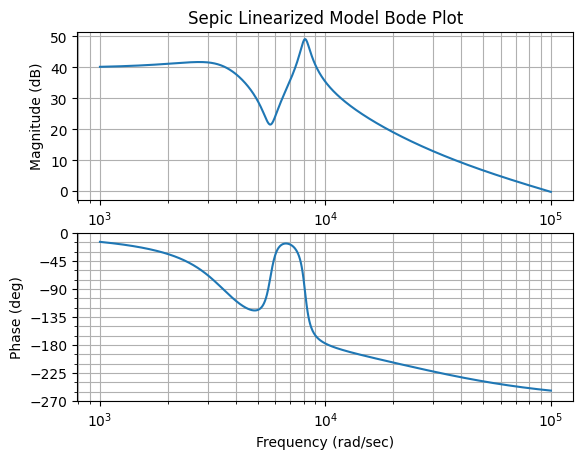

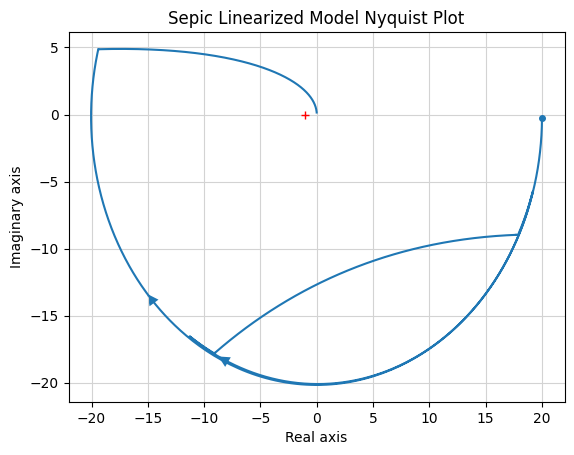

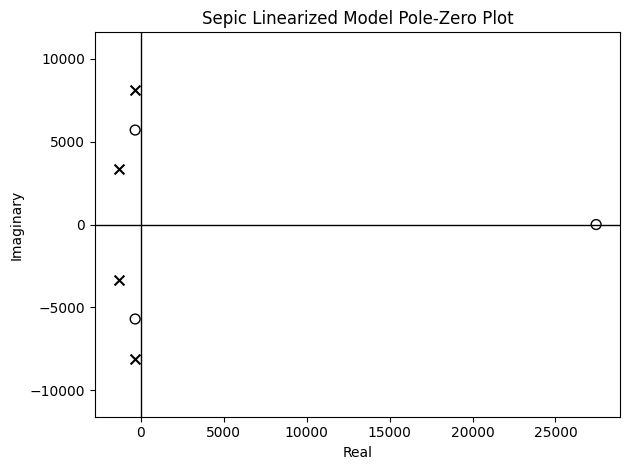

In [32]:
# Look at the frequency response and other control plots
fvec = np.logspace(1, 5, 10000)
omegavec = fvec * 2 * np.pi

fig = plt.figure()
ctr.bode_plot(sys)
fig.axes[0].set_title('Sepic Linearized Model Bode Plot')

fig, ax = plt.subplots()
ctr.nyquist(sys, omegavec, primary_style=['-', '-'], mirror_style=False)
ax.set_title('Sepic Linearized Model Nyquist Plot')

fig = plt.figure() 
ctr.pzmap(sys)
plt.title('Sepic Linearized Model Pole-Zero Plot')
fig.tight_layout()

Text(0.5, 0, 'Time [s]')

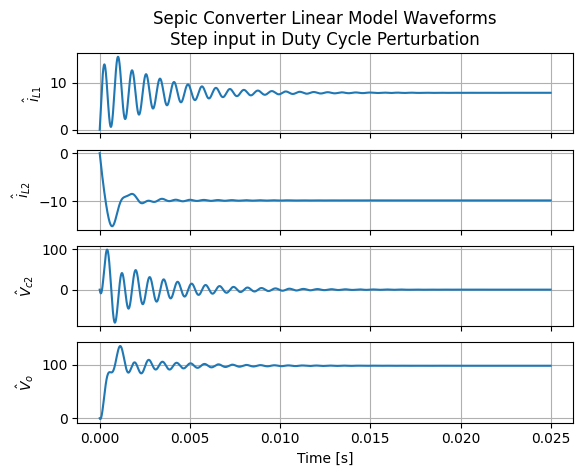

In [33]:
# Simulate the state space model and compare it to PSIM
time = np.arange(0, 0.025, 1e-5)
# u = np.array([np.zeros_like(time), np.ones_like(time)]).T # u for full system
u = np.ones_like(time).T # u for reduced system
y, t, x = ctrm.lsim(sys, u, time)

fig, ax = plt.subplots(4, 1, sharex=True)

ax[0].set_title('Sepic Converter Linear Model Waveforms\nStep input in Duty Cycle Perturbation')

p = 0
ax[p].plot(time, x[:, 0])
ax[p].set_ylabel('$\hat{i}_{L1}$')
ax[p].grid('enable')

p += 1
ax[p].plot(time, x[:, 1])
ax[p].set_ylabel('$\hat{i}_{L2}$')
ax[p].grid('enable')

p += 1
ax[p].plot(time, x[:, 2])
ax[p].set_ylabel('$\hat{V}_{c2}$')
ax[p].grid('enable')

p += 1
ax[p].plot(time, y)
ax[p].set_ylabel('$\hat{V}_o$')
ax[p].grid('enable')


ax[p].set_xlabel('Time [s]')

Control-To-Output Transfer Function Equation:


-(I_L1 - I_L2 + (-Do*(Do - 1)/(L_2*S) - (Do - 1)**2/(L_1*S))*(Do*(V_C1 + V_C2)/(L_2*S) + I_L1 - I_L2 - (1 - Do)*(V_C1 + V_C2)/(L_1*S))/(C_1*S + Do**2/(L_2*S) + (Do - 1)**2/(L_1*S)) + (Do - 1)*(V_C1 + V_C2)/(L_2*S) + (Do - 1)*(V_C1 + V_C2)/(L_1*S))/(C_2*S - (Do*(Do - 1)/(L_2*S) + (Do - 1)**2/(L_1*S))**2/(C_1*S + Do**2/(L_2*S) + (Do - 1)**2/(L_1*S)) + 1/Ro + (Do - 1)**2/(L_2*S) + (Do - 1)**2/(L_1*S))

Evaluated:


(-2.8e-5*S**3 + 0.75*S**2 - 400.0*S + 25000000.0)/(3.0e-10*S**4 + 1.0e-6*S**3 + 0.0241836734693878*S**2 + 55.1020408163265*S + 255102.040816327)

Coefficient Arrays:

Num: [-2.8e-05, 0.75, -399.9999999999998, 25000000.0]
Den: [3e-10, 1e-06, 0.024183673469387757, 55.102040816326536, 255102.04081632654]

Transfer Function:



TransferFunction(array([-2.8e-05,  7.5e-01, -4.0e+02,  2.5e+07]), array([3.00000000e-10, 1.00000000e-06, 2.41836735e-02, 5.51020408e+01,
       2.55102041e+05]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


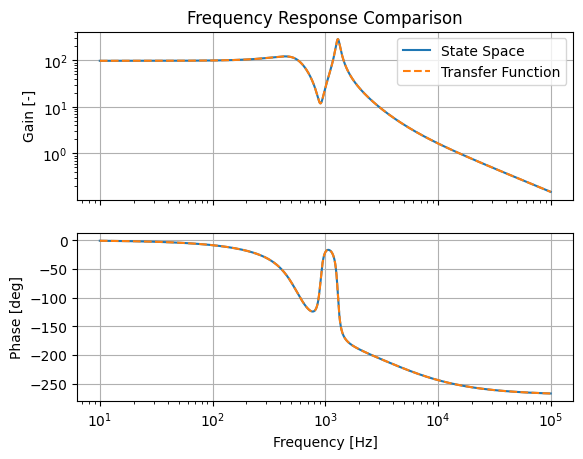

In [34]:
# Get the transfer function and compare to the state space model
# Define symbols for symbolic calculation
L_1, L_2, C_1, C_2, I_L1, I_L2, V_C1, V_C2, Ro, Do, S = sp.symbols('L_1 L_2 C_1 C_2 I_L1 I_L2 V_C1 V_C2 Ro Do S')

# Define intermediate transfer functions
G1 = C_1*S + Do**2/(L_2*S) + (1-Do)**2/(L_1*S)
G2 = Do*(1-Do)/(L_2*S) - (1-Do)**2/(L_1*S)
G3 = -Do*(V_C1+V_C2)/(L_2*S) + (1-Do)*(V_C1+V_C2)/(L_1*S) + (I_L2-I_L1)
G4 = C_2*S + (1-Do)**2/(L_2*S) + (1-Do)**2/(L_1*S) + 1/Ro
G5 = -(1-Do)**2/(L_1*S) + Do*(1-Do)/(L_2*S)
G6 = (1-Do)*(V_C1+V_C2)/(L_1*S) + (1-Do)*(V_C1+V_C2)/(L_2*S) + (I_L2-I_L1)
G7 = G4 - G5*G2/G1
G8 = G5*G3/G1 + G6


# Define control to output transfer function
G_tot = sp.simplify(G8 / G7)
print('Control-To-Output Transfer Function Equation:')
display(G_tot)

# Evaluate the expression
substitution = [ # Replace symbolic varibles with real ones
    (L_1, L1),
    (L_2, L2),
    (C_1, C1),
    (C_2, C2),
    (I_L1, IL1),
    (I_L2, IL2),
    (V_C1, Vc1),
    (V_C2, Vc2),
    (Ro, R),
    (Do, D)
]

G_tot_result = G_tot.subs(substitution).evalf().simplify()
print('Evaluated:')
display(sp.simplify(G_tot_result))

# Create a transfer function object
num = [float(x) for x in G_tot_result.as_numer_denom()[0].as_poly().all_coeffs()]
den = [float(x) for x in G_tot_result.as_numer_denom()[1].as_poly().all_coeffs()]
H = ctr.tf(num, den)

print('Coefficient Arrays:\n')
print(f'Num: {num}')
print(f'Den: {den}')

print('\nTransfer Function:\n')
display(H)


# Plot the bode plot using this transfer function and compare to the state space model
fig, ax = plt.subplots(2, 1, sharex=True)
mss, pss, _ = ctrm.freqresp(sys, omegavec)
mtf, ptf, _ = ctrm.freqresp(H, omegavec)
ax[0].loglog(fvec, mss, label='State Space')
ax[0].loglog(fvec, mtf, '--', label='Transfer Function')
ax[0].grid('enable')
ax[0].legend()
ax[0].set_title('Frequency Response Comparison')
ax[0].set_ylabel('Gain [-]')

ax[1].semilogx(fvec, np.unwrap(pss) * 180 / np.pi, label='State Space')
ax[1].semilogx(fvec, np.unwrap(ptf) * 180 / np.pi, '--', label='Transfer Function')
ax[1].grid('enable')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [deg]')

# Save the figure
plt.savefig(f'figs/sepic_freqresp.eps', format='eps')